<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/supervised_learning_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
churn = pd.read_csv('/content/telecom_churn_clean.csv')
print(churn.head())

   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  \
0           0             128        415                   0                1   
1           1             107        415                   0                1   
2           2             137        415                   0                0   
3           3              84        408                   1                0   
4           4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4             

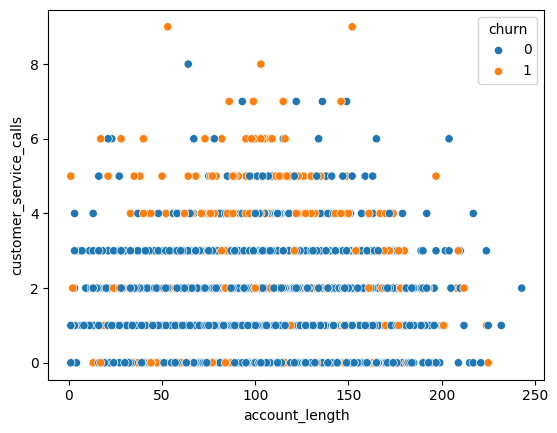

In [14]:
sns.scatterplot(x='account_length',y='customer_service_calls',hue='churn',data=churn)
plt.show()

In [15]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn["churn"].values
X = churn[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [16]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = knn.predict(X_new)
print('Prediction: {}'.format(y_pred))

Prediction: [0 1 0]


The model has predicted the first and third customers will not churn in the new array.

Train/Test Split plus Computing Accuracy

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.8545727136431784


## Overfitting and Underfitting(Model Complexity)

In [23]:
#Create neighbors and train, test accuarcies
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

#Loop through the neighbors
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)

  #Fit The Model
  knn.fit(X_train, y_train)

  #Compute accuracy
  train_accuracies[neighbor]= knn.score(X_train,y_train)
  test_accuracies[neighbor]= knn.score(X_test,y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 0.846211552888222, 2: 0.873218304576144, 3: 0.8739684921230307, 4: 0.8690922730682671, 5: 0.872093023255814, 6: 0.8653413353338335, 7: 0.8702175543885972, 8: 0.8634658664666166, 9: 0.8660915228807202, 10: 0.8630907726931732, 11: 0.8642160540135033, 12: 0.8630907726931732} 
 {1: 0.7766116941529235, 2: 0.8500749625187406, 3: 0.8425787106446777, 4: 0.8530734632683659, 5: 0.8515742128935532, 6: 0.8545727136431784, 7: 0.8605697151424287, 8: 0.856071964017991, 9: 0.8590704647676162, 10: 0.8545727136431784, 11: 0.8590704647676162, 12: 0.8545727136431784}


As the k increases, the training accuracies also increases and same with the testing accuracies

# Visualizing Model Complexity

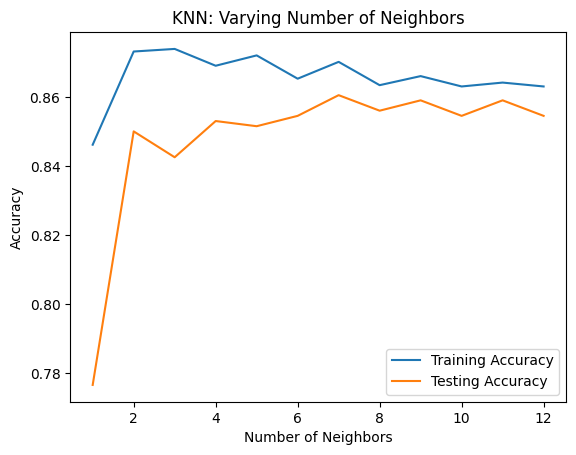

In [24]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

For the training and testing accuracy, both increases with increase in k..For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model.